# Proyecto CENSO 2017

ID-1

Noviembre 2022

# Declaración de compromiso ético




Nosotros **Kianush Atighi-Moghaddam, Arturo Avendaño, Alonso Rojas, Diego Vera**, declaramos que realizamos de manera grupal los pasos de la presente actividad. También declaramos no incurrir en copia, ni compartir nuestras respuestas con otras personas ni con otros grupos. Por lo que, ratificamos que las respuestas son de nuestra propia confección y reflejan nuestro propio conocimiento. También, declaramos conocer y aceptar las reglas de este tipo de actividad, que han sido explicadas y aclaradas por el cuerpo académico de la asignatura.

# Introducción


## Propósito del análisis

El propósito de este desarrollo consiste en resolver la incertidumbre que se genera cada vez que se levantan los datos del CENSO, ya que, a veces, no es posible acceder a revisar el tipo de terreno o tipo de entidad, siendo estas estimadas o simplemente indeterminadas, ya sea por fallas de los censistas, falta de permisos o falta de disposición de los residentes. De esta manera, los datos para futuros estudios quedan inconclusos y/o con vacíos en la información, generando trabajo extra para los analistas de datos que deseen trabajar con esa información para realizar otros tipos de estudios.

Para solucionar este problema, se plantean métodos para predecir la clase de la manzana, dígase el tipo de entidad (campo, pueblo, caserío, etc.) que esta representa, junto con su clasificación urbana o rural, con el fin de poder completar los datos para futuros análisis.

A base de los datos obtenidos por el censo, entre los cuales se encuentra el acceso a agua potable y la materialidad de las casas dentro de la manzana, podría ser posible obtener tal información.

## Cambio de enfoque

Tomando en cuenta la retroalimentación de los avances anteriores, se decidió abandonar la idea de predecir algún tipo de indicador de pobreza con los datos del censo. En vez de eso, se tomó una alternativa más realista, la cual consiste en responder preguntas relacionadas con la materialidad de las manzanas y la categorización de clases indeterminadas a base de atributos de materialidad, agua y otros sobre los que se realizarán pruebas para determinar cuáles son los más apropiados para realizar predicciones y responder a las interrogantes.

# Exploración de los datos



Dentro de esta fase se realizará una exploración de los datos ya avanzados de los hitos anteriores, los cuales ya se encuentran en un estado donde se realizó la limpieza, junto con un cambio de nombre de las variables para una mejora en la comprensión humana. En cuanto a los cambios para el trabajo dentro del último hito, se encuentra la eliminación de los datos que no son relevantes para la investigación.

Se contarán con 180 mil datos totales que corresponden al estudio, junto con 22 mil datos clasificados que serán divididos entre training y testing. Con ello se buscan las mejores variables para obtener precisión en la determinación de la clase.

### Preparación del dataset


Primero se decidió importar el dataset generado del primer hito en una etapa temprana, ya que las columnas que son útiles ahora son distintas, debido a que en esta nueva instancia el dataset posee mayor cantidad de datos.

In [1]:
# Se realiza la inclusión de la librerias a utilizar.
import pandas as pd
import numpy as np
from sklearn import preprocessing
# Se Cargan los datos del dataset desde un repositorio en Github
Censo_Filtrado = pd.read_csv('https://raw.githubusercontent.com/DiegoVeraSuazo/IngenieriaDeDatos_G4/main/resultado_hito1.csv') 

### Quitar columnas



Para el presente análisis se quitarán algunas columnas que no son relevantes, esto incluye mayoritariamente datos demográficos relacionados a las proporciones de edad y género por manzana, junto con datos geográficos redundantes.

In [2]:
# Se utiliza el método drop de la libreria pandas, para remover las columnas que no se van a utilizar
Censo_Filtrado = Censo_Filtrado.drop(["HOMBRES", "MUJERES", "CANT_HOG", "EDAD_0A5", "EDAD_6A14", "EDAD_15A64", "EDAD_65YMAS",
                   "INMIGRANTES", "PUEBLO", "NOM_LOCALIDAD", "NOM_ENTIDAD",
                   "NOM_REGION_15R", "NOM_COMUNA_15R", "NOM_PROVINCIA_15R", "NOM_COMUNA", "NOM_PROVINCIA"], axis=1)

### Descripción de las columnas



Las columnas del dataset que se utilizarán para el presente análisis, ordenadas de principio a fin, son las siguientes:
- **PERSONAS**: Número total de personas de la manzana
- **VIVIENDA_PARTICULAR**: Total de viviendas particulares.
- **VIVIENDA_COLECTIVA**: Total de viviendas colectivas.
- **VIVIENDA_PARTICULAR_OCUPADA**: Total de viviendas particulares ocupadas con moradores presentes.
- **TOTAL_VIV**: Total de viviendas de la manzana.
- **TIPO_VIV_CASA**: Tipo de vivienda particular “Casa”.
- **TIPO_VIV_DPTO**: Tipo de vivienda particular “Departamento en edificio”.
- **TIPO_VIV_TRADICIONAL**: Tipo de vivienda particular “Vivienda tradicional indígena (ruka, pae pae u otras)”.
- **TIPO_VIV_CONVENTILLO**: Tipo de vivienda particular “Pieza en casa antigua o en conventillo”.
- **TIPO_VIV_MEDIAGUA**: Tipo de vivienda particular “Mediagua, mejora, rancho o choza”.
- **TIPO_VIV_MOVIL**: Tipo de vivienda particular “Móvil (carpa, casa rodante o similar)”.
- **TIPO_VIV_OTRO**: Otro tipo de vivienda particular.
- **MATERIAL_MURO_EXT_HORMIGON**: Materialidad en las paredes exteriores con hormigón armado.
- **MATERIAL_MURO_EXT_ALBANILERIA**: Materialidad en las paredes exteriores con albañilería: bloque de cemento, piedra o ladrillo.
- **MATERIAL_MURO_EXT_TABIQUE_FORRADO**: Materialidad en las paredes exteriores con tabique forrado por ambas caras (madera o acero).
- **MATERIAL_MURO_EXT_TABIQUE_SIN_FORRO**: Materialidad en las paredes exteriores con tabique sin forro interior (madera u otro).
- **MATERIAL_MURO_EXT_ADOBE_BARRO_QUINCHA**: Materialidad en las paredes exteriores de adobe, barro, quincha, pirca u otro artesanal tradicional.
- **MATERIAL_MURO_EXT_PRECARIOS**: Materialidad en las paredes exteriores con materiales precarios (lata, cartón, plástico, etc.).
- **MAT_CUB_TECHO_TEJAS_METALICAS_CEMENT_MADERA_ASFALTICA**: Materialidad en la cubierta del techo con tejas o tejuelas de arcilla, metálicas, de cemento, de madera, asfálticas o plásticas.
- **MAT_CUB_TECHO_LOSA_HORMIGON**: Materialidad en la cubierta del techo de losa hormigón.
- **MAT_CUB_TECHO_PLANCHAZINC_COBRE_FIBROCEMENTO**: Materialidad en la cubierta del techo de planchas metálicas de zinc, cobre, etc. o fibrocemento (tipo pizarreño).
- **MAT_CUB_TECHO_FONOLITA**: Materialidad en la cubierta del techo de fonolita o plancha de fieltro embreado.
- **MAT_CUB_TECHO_PAJA_COIRON_TOTORA_CAÑA**: Materialidad en la cubierta del techo de paja, coirón, totora o caña.
- **MAT_CUB_TECHO_MATERIALES_PRECARIO**: Materialidad en la cubierta del techo de materiales precarios (lata, cartón, plástico, etc.)
- **MAT_CUB_TECHO_SIN_CUBIERTA_SOLIDA**: Materialidad en la cubierta del techo sin cubierta sólida del techo.
- **MAT_PISO_PAQUET_PISOFLOTANTE_CERAMICO**: Materialidad en el piso de parquet, piso flotante, cerámico, madera, alfombra, flexit, cubrepiso u otro similar; sobre radier o vigas de madera.
- **MAT_PISO_RADIER_SIN_REVESTIMIENTO**: Materialidad en el piso de radier sin revestimiento.
- **MAT_PISO_BALDOSA_CEMENTO**: Materialidad en el piso de baldosa de cemento.
- **MAT_PISO_CAPACEMENTO_SOBRE_TIERRA**: Materialidad en el piso de capa de cemento sobre tierra.
- **MAT_PISO_TIERRA**: Materialidad en el piso de tierra.
- **MAT_ACEPTABLE**: Total de viviendas con materialidad aceptable.
- **MAT_RECUPERABLE**: Total de viviendas con materialidad recuperable.
- **MATIRREC**: Total de viviendas con materialidad irrecuperable.
- **ORIGEN_AGUA_RED_PUBLICA**: Cantidad de viviendas que declaran que el origen del agua es de red pública.
- **ORIGEN_AGUA_POZO**: Cantidad de viviendas que declaran que el origen del agua es de pozo o noria.
- **ORIGEN_AGUA_CAMION_ALJIBE**: Cantidad de viviendas que declaran que el origen del agua es de camión aljibe.
- **ORIGEN_AGUA_RIO_VERTIENTE_ESTERO_CANAL_LAGO**: Cantidad de viviendas que declaran que el origen del agua es de río, vertiente, estero, canal, lago, etc.
- **NOM_CAT_ENT**: Categoría de la manzana. (Aldea, Asentamiento Minero, Asentamiento Pesquero, Campamento, Caserío, Comunidad Indígena, Fundo-Estancia-Hacienda, Parcela de Agrado, Parcela-Hijuela, Veranada-Majada-Aguada, Otros)
- **NOM_AREA**: Área de tipo urbana o rural.
- **NOM_REGION**: Nombre de la región donde se ubica la manzana.

### Índice de materialidad de la manzana


Se genera un nuevo dato que corresponde al índice de materialidad de la manzana, el cual entrega una idea general de la calidad promedio de los materiales de la manzana, teniendo en cuenta que las viviendas se pueden clasificar por materialidad aceptable, recuperable e irrecuperable. Para calcular este índice se implementa la siguiente fórmula:


$ indice.mat = \frac{(MAT.ACEPTABLE  +  MAT.RECUPERABLE  +  MATIRREC)}{(MAT.ACEPTABLE + 2 * MAT.RECUPERABLE + 4 * MATIRREC)} $

Este índice se encuentra dentro del rango [0.25, 1], es decir, a mayor valor, la manzana posee una mejor calidad de materialidad en promedio y viceversa.

In [3]:
# Se realiza una copia de las Columnas MAT_ACEPTABLE, MAT_RECUPERABLE y MATIRREC para la realizar el calculo del Indice de Materialidad
materialidad_Censo_Filtrado = Censo_Filtrado.iloc[:,[30,31,32]].copy()

#Formula de materialidad
indice_mat = (materialidad_Censo_Filtrado.iloc[:,0] + materialidad_Censo_Filtrado.iloc[:,1] + materialidad_Censo_Filtrado.iloc[:,2]) / (materialidad_Censo_Filtrado.iloc[:,0] + 2 * materialidad_Censo_Filtrado.iloc[:,1] + 4 * materialidad_Censo_Filtrado.iloc[:,2])
materialidad_Censo_Filtrado['Indice_mat'] = indice_mat

#Inclusión del Indice de Materialidad en el dataset original bajo la columna Indice_mat
Censo_Filtrado['Indice_mat'] = indice_mat

#Rellenado de celda con valor NaN a 0
Censo_Filtrado = Censo_Filtrado.fillna(0)
Censo_Filtrado = Censo_Filtrado.replace(np.nan, 0)

### Normalización de variables para mejorar la precisión del modelo antes mencionado.


Anteriormente se contaba con los valores sin normalizar, lo cual no presenta utilidad actualmente, pues se requiere analizar las manzanas independientemente de su cantidad de viviendas. Junto con ello, tener los datos normalizados permitirá sumar los datos sin que la densidad de casas por manzana afecte, a modo de ejemplo, no ocurrirá que la calidad de los materiales aparecerá mejor en Santiago solo porque Santiago tiene más casas.

In [4]:
# Normalización de los Datos Relacionados con las viviendas
Censo_Filtrado.iloc[:,1:4] = Censo_Filtrado.iloc[:,1:4].div(Censo_Filtrado.iloc[:,4], axis='index')
Censo_Filtrado.iloc[:,5:33] = Censo_Filtrado.iloc[:,5:33].div(Censo_Filtrado.iloc[:,4], axis='index')

# Normalización relacionada con el agua
denominador = Censo_Filtrado.iloc[:,33:37].sum(axis=1)
Censo_Filtrado.iloc[:,33:37] = Censo_Filtrado.iloc[:,33:37].div(denominador, axis='index')

#Rellenado de celda con valor NaN a 0
Censo_Filtrado = Censo_Filtrado.fillna(0)
Censo_Filtrado = Censo_Filtrado.replace(np.nan, 0)

### Verificación de la normalización




Se utiliza el método describe() para verificar que la normalización fue usando el máximo indicado y ninguno de los valores normalizados supere el valor 1.0

In [5]:
# Uso del método describe de la libreria de pandas para observar el estado de los valores normalizados
Censo_Filtrado.describe()

,PERSONAS,VIVIENDA_PARTICULAR,VIVIENDA_COLECTIVA,VIVIENDA_PARTICULAR_OCUPADA,TOTAL_VIV,TIPO_VIV_CASA,TIPO_VIV_DPTO,TIPO_VIV_TRADICIONAL,TIPO_VIV_CONVENTILLO,TIPO_VIV_MEDIAGUA,...,MAT_PISO_CAPACEMENTO_SOBRE_TIERRA,MAT_PISO_TIERRA,MAT_ACEPTABLE,MAT_RECUPERABLE,MATIRREC,ORIGEN_AGUA_RED_PUBLICA,ORIGEN_AGUA_POZO,ORIGEN_AGUA_CAMION_ALJIBE,ORIGEN_AGUA_RIO_VERTIENTE_ESTERO_CANAL_LAGO,Indice_mat
count,180499.000000,180499.000000,180499.000000,180499.000000,180499.000000,180499.000000,180499.000000,180499.000000,180499.000000,180499.000000,...,180499.000000,180499.000000,180499.000000,180499.000000,180499.000000,180499.000000,180499.000000,180499.000000,180499.000000,180499.000000
mean,97.363437,0.993575,0.006414,0.841845,36.007706,0.918312,0.040361,0.001219,0.006834,0.018586,...,0.016375,0.004615,0.667500,0.148452,0.016005,0.856893,0.059145,0.020003,0.027055,0.808500
std,149.647870,0.063840,0.063754,0.220091,61.678846,0.212909,0.176561,0.030199,0.037512,0.082779,...,0.047598,0.032893,0.263459,0.170003,0.059636,0.329677,0.196568,0.107223,0.133213,0.217958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,1.000000,0.000000,0.811321,14.000000,0.952381,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.521739,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.720000
50%,63.000000,1.000000,0.000000,0.913043,22.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.733333,0.096774,0.000000,1.000000,0.000000,0.000000,0.000000,0.857143
75%,105.000000,1.000000,0.000000,0.976190,35.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.875000,0.230769,0.000000,1.000000,0.000000,0.000000,0.000000,0.989583
max,9197.000000,1.000000,1.000000,1.000000,2575.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Visualización de datos



Para poder visualizar una matriz de correlación representativa, primero se realizaron varias matrices de correlación pequeñas utilizando diferentes subconjuntos de atributos, debido a que la cantidad de atributos del dataset es muy alta. A partir de esto, se buscan los atributos con mayor correlación, los cuales deberían ser descartados para los modelos de predicción al ser redundantes para tal uso.

A continuación se muestra la matriz representativa de la mayoría de matrices que fueron probadas. En resumen, los tipos de materiales de las viviendas están fuertemente relacionados con su recuperabilidad, además los tipos de vivienda no poseen relación con los demás tipos de atributos. Por lo tanto, se deberían descartar los atributos que hablan sobre el tipo de material.

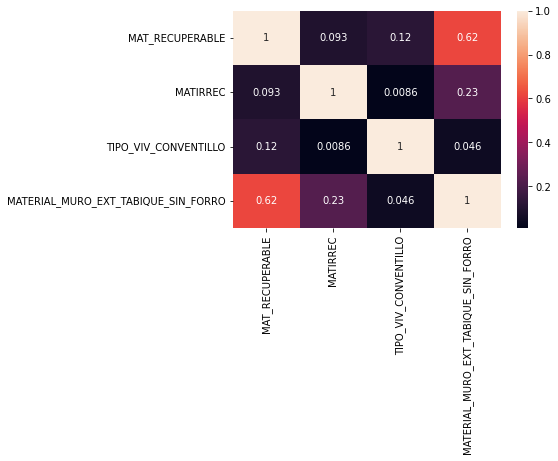

In [6]:
#Implementación de las librerias a utilizar para el realizado de una matriz de correlación
import seaborn as sn
import matplotlib.pyplot as plt

# Se escogen las columnas que serán parte del proceso de correlación (MAT_RECUPERABLE, 
#  MATIRREC, TIPO_VIV_CONVENTILLO y MATERIAL_MURO_EXT_TABIQUE_SIN_FORRO)
corrMatrix_data = Censo_Filtrado.iloc[:,[31,32,8,15]]

# Se realiza el cálculo de correlación entre los valores dados para luego ser visualizados a través del uso de un mapa de calor.
corrMatrix = corrMatrix_data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

### Gráfico de BoxPlot sobre índice de materialidad 



Se utiliza un gráfico de boxplot para visualizar de mejor forma y revisar la dispersión de los datos con respecto al índice de materialidad. Se observa que el promedio es cercano al valor 0.85, además este valor fluctúa aproximadamente entre 0.7 y 0.98. Por lo tanto, este índice refleja de forma más simple y directa el nivel de calidad de materialidad por manzana, por lo que es viable reemplazarlo por los 3 atributos de recuperabilidad de viviendas en la fase experimental.

<AxesSubplot:>

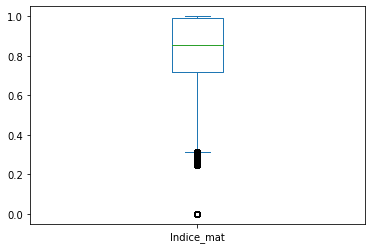

In [7]:
# Visualización del indice de materialidad a traves de un boxplot realizado con el plot de la libreria de pandas
Censo_Filtrado["Indice_mat"].plot(kind='box')

### Distribución de viviendas


Un atributo que podría ayudar a predecir la categoría de una manzana es su porcentaje de viviendas que son colectivas y las que no los son. Sin embargo, se puede observar que el número de viviendas colectivas registradas son muy pequeñas en comparación, por lo que habría muy pocos datos para que un clasificador usara este atributo como diferenciador. Por ello, se sugiere descartar tal atributo.

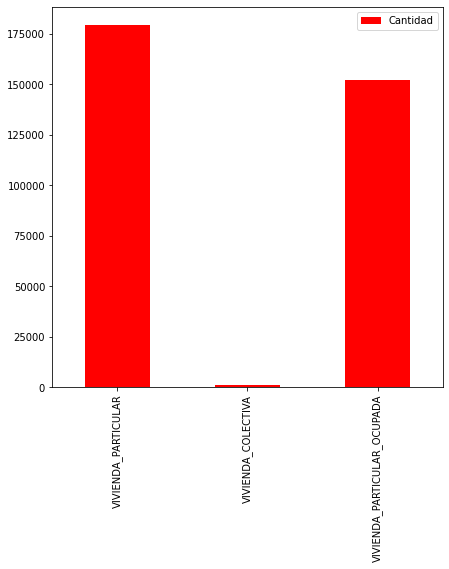

In [8]:
import matplotlib.pyplot as plt

# Se realiza una suma de todos los valores de la columnas con el proposito de observar las diferencias de los totales de cada columnas
Censo_Filtrado_totales_plot = pd.DataFrame(Censo_Filtrado.sum(), columns=['Cantidad'])
Censo_Filtrado_totales_plot['Tipo'] = Censo_Filtrado.columns.tolist()

# Se realiza la visualización de los tipo de viviendas totales contabilizados dentro del Censo con el uso del Plot p
plt_censo_total_viv = Censo_Filtrado_totales_plot.iloc[1:4,:].plot(kind = "bar", color = 'red', figsize = (7,7))
plt.show()

### Tipos de vivienda


Se estima que el tipo de vivienda podría ayudar a predecir la categoría de la manzana, esto tiene sentido si se observa que en un campo o un pueblo pequeño es improbable que hayan departamentos, es decir, hay tipos de vivienda que son más comunes en algunas categorías que en otras.

Del gráfico de barras se observa que la gran mayoría de las viviendas en Chile corresponden a casas. Se cree que podrían existir casas en muchas categorías distintas, sin embargo la distribución de las demás categorías es más pareja y podrían usarse para predecir la categoría de la manzana, por lo tanto se considerarán en la fase experimental.

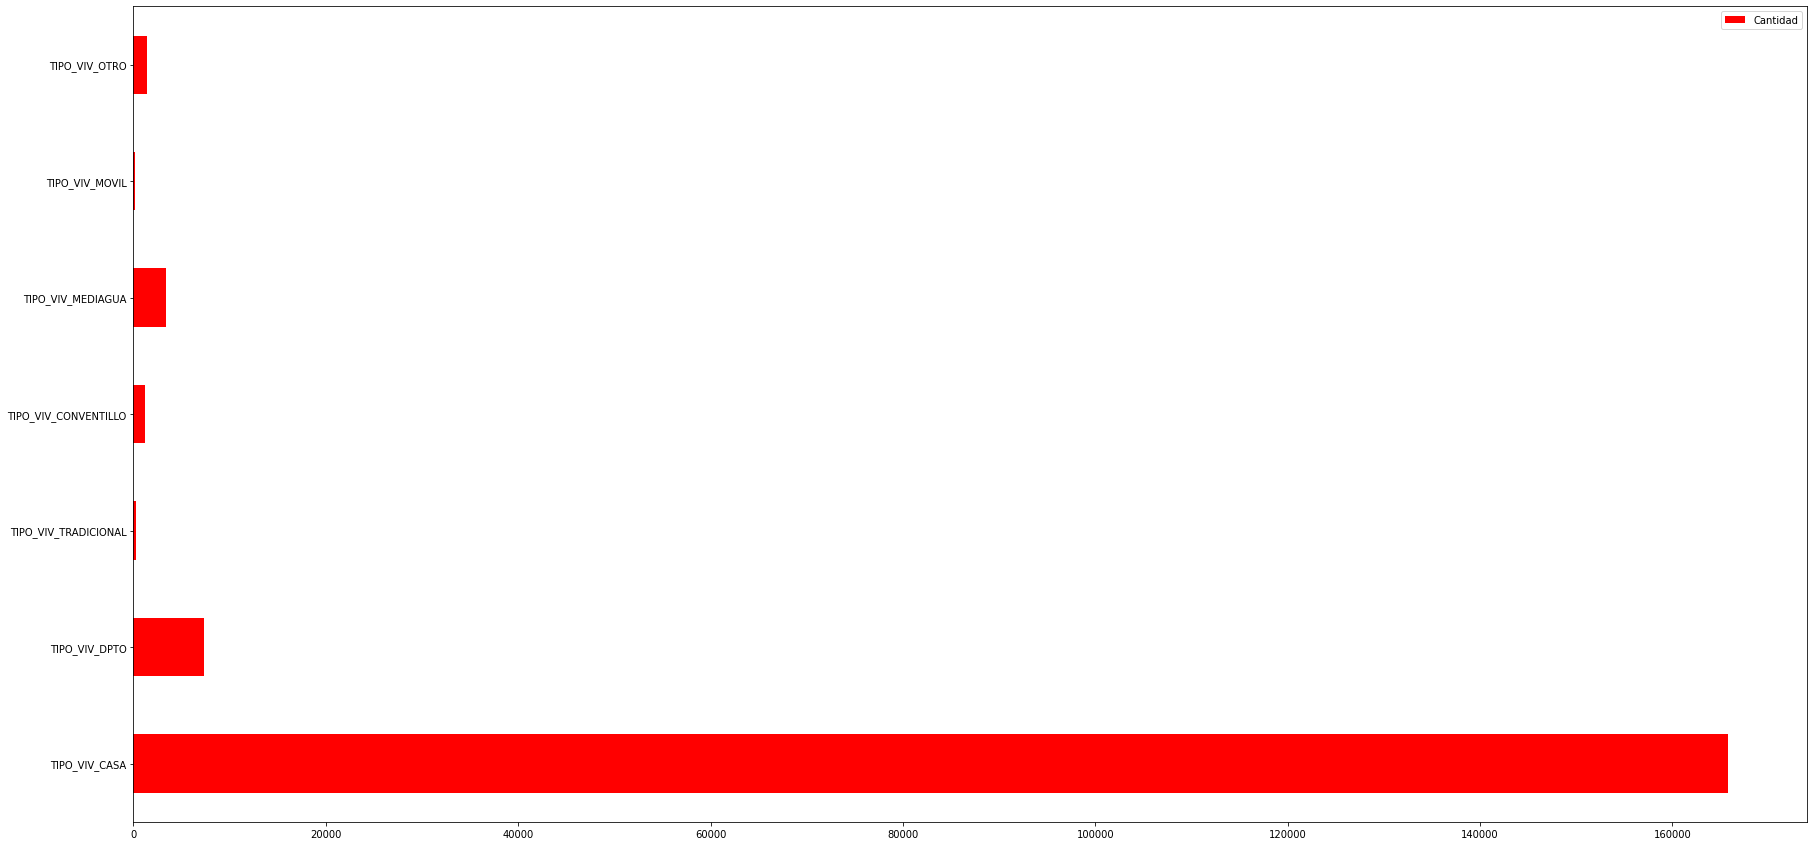

In [9]:
# Se realiza una suma de todos los valores de las columnas con el propósito de observar las diferencias de los totales de cada columna
Censo_Filtrado_totales_plot = pd.DataFrame(Censo_Filtrado.sum(), columns=['Cantidad'])
Censo_Filtrado_totales_plot['Tipo'] = Censo_Filtrado.columns.tolist()

# Se realiza la visualización de los tipos de viviendas totales contabilizados dentro del Censo con el uso del Plot propio de Pandas
plt_censo_total_tipo_viv = Censo_Filtrado_totales_plot.iloc[5:12,:].plot.barh(y = "Cantidad", color='red', figsize=((30,15)))
plt.show()

### Recuperabilidad de los materiales


A partir de las definiciones del manual del CENSO, se sabe que existe una posible relación entre la recuperabilidad de los materiales y la categoría de la manzana, además por definición, si una manzana contiene materiales de tierra, se estima que su condición de materialidad sea irrecuperable. Se estima que tener pisos de tierra podría implicar que la manzana pertenece a ciertas categorías y no a otras, a modo de ejemplo, es más probable que en una ciudad haya más pavimentación que en un campo y, por lo tanto, menos porcentaje de pisos de tierra.

Del gráfico de barras se desprende que la mayoría de las manzanas cuentan con
una materialidad aceptable, lo cual se corrobora con la distribución de los datos con respecto al índice de materialidad.

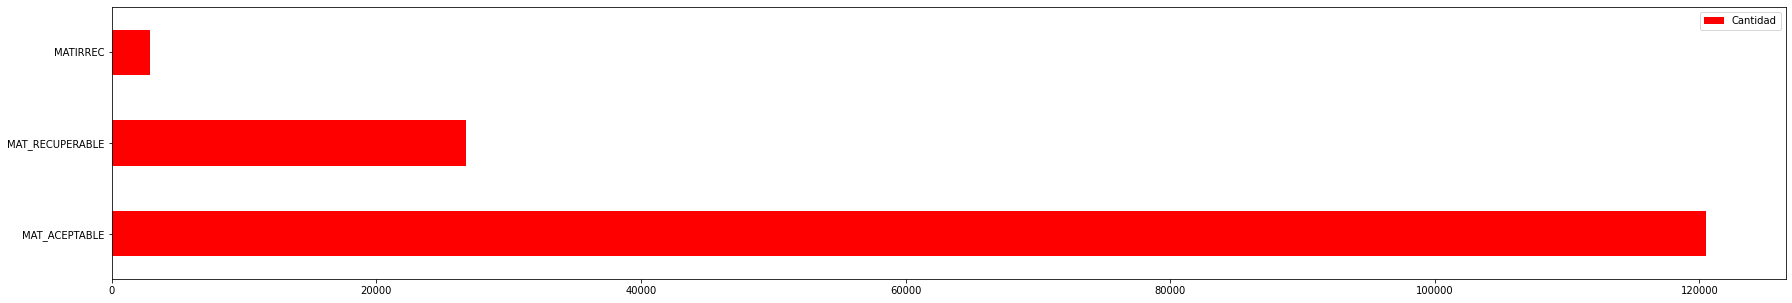

In [10]:
# Se realiza una suma de todos los valores de las columnas con el propósito de observar las diferencias de los totales de cada columna
Censo_Filtrado_totales_plot = pd.DataFrame(Censo_Filtrado.sum(), columns=['Cantidad'])
Censo_Filtrado_totales_plot['Tipo'] = Censo_Filtrado.columns.tolist()

# Se realiza la visualización de la clasificación con respecto a la aceptabilidad de los materiales de construcción usados en los hogares que recibieron los hogares Censados, 
# esto a través del método Plot propio de Pandas
plt_censo_total_rec_mat = Censo_Filtrado_totales_plot.iloc[30:33,:].plot.barh(y = "Cantidad", color='red', figsize=((30,5)))
plt.show()

### Origen del agua


Se estima que los atributos asociados al origen del agua pueden estar fuertemente asociados a la categoría de la manzana, debido a que, si el origen del agua de una manzana proviene de vertiente, pozo o camión aljibe, podría ser un fuerte indicador de que la manzana corresponde un campo o caserío.

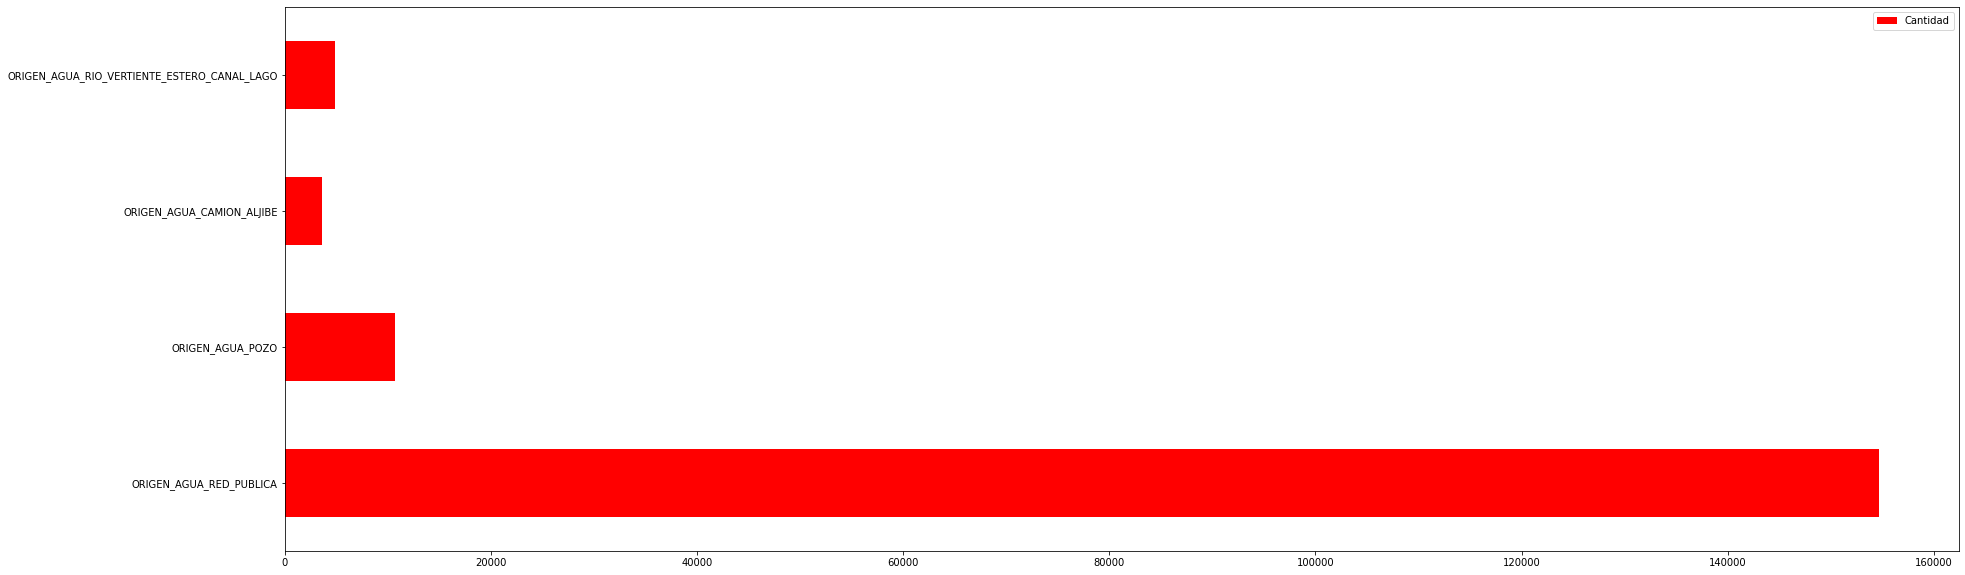

In [11]:
Censo_Filtrado_totales_plot = pd.DataFrame(Censo_Filtrado.sum(), columns=['Cantidad'])
Censo_Filtrado_totales_plot['Tipo'] = Censo_Filtrado.columns.tolist()

# Se realiza una visualización del Origen de Agua de cada Manzana dentro del Censo  
plt_censo_total_fuente_agua = Censo_Filtrado_totales_plot.iloc[33:37,:].plot.barh(y = "Cantidad", color='red', figsize=((30,10)))
plt.show()

Posteriormente se utiliza un gráfico tipo torta para representar de mejor manera la distribución del origen del agua a nivel nacional. De este gráfico se desprende que, según los datos, la mayoría del agua provista a las manzanas viene de la red pública, aunque no indica si la calidad es rural o urbana.

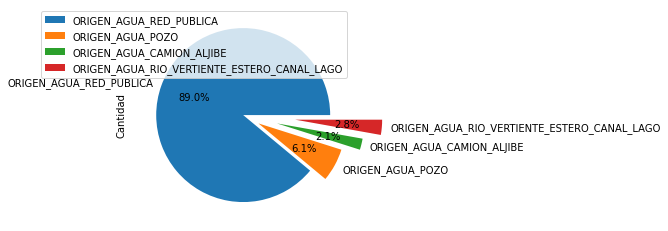

In [12]:
#Se suman los datos por columna
Censo_Filtrado_totales_plot = pd.DataFrame(Censo_Filtrado.sum(), columns=['Cantidad'])
Censo_Filtrado_totales_plot['Tipo'] = Censo_Filtrado.columns.tolist()
myexplode = [0, 0.2, 0.4, 0.6]

# Se visualiza los porcentajes de consumo de agua, tomando en consideración si el origen de esta 
plt_censo_total_fuente_agua = Censo_Filtrado_totales_plot.iloc[33:37,:].plot.pie(y="Cantidad", figsize=((4,4)), autopct='%1.1f%%', startangle=0, explode = myexplode)
plt.show()

# Problemas


## Problema 1
 
El primer problema consiste en predecir la clase NOM_CAT_ENT de una manzana, la cual corresponde a su categoría de entidad (ciudad, pueblo, aldea, caserío, etc.). Lo anterior se eligió luego de hacer el análisis exploratorio y observar que muchas filas tienen la columna NOM_CAT_ENT con valor indeterminado. Este problema se considera como clasificación multiclase.

## Problema 2
 
El segundo problema consiste en predecir el atributo NOM_AREA que corresponde al tipo de área de una manzana, este atributo indica si la manzana se encuentra en un área rural o urbana. Este problema se identifica como clasificación binaria.

# Propuesta metodológica experimental


## Propuesta experimental problema 1
### Método de buscar clasificador

Se abordarán los dos problemas propuestos de manera similar. En el caso del problema de clasificación de la columna NOM_CAT_ENT se creará un modelo de predicción. Para hacer el modelo se entrenará un árbol de decisión. Se elige este tipo de predictor debido a que se infiere que una categoría de área para una manzana se podría decidir en base a decisiones binarias.

El árbol se entrenará en base a distintas configuraciones, es decir, utilizará un rango de 1 a 14 profundidades máximas, junto con 2 criterios que corresponden al de entropía y gini, para comprobar cuál es la combinación de parámetros más adecuada para predecir NOM_CAT_ENT.

Para entrenar los árboles de decisión, se separará el dataset mencionado en un conjunto de entrenamiento y otro de prueba, los cuales se dividirán en la proporción 70/30 respectivamente, ya que se considera que al utilizar el doble de datos para entrenamiento, se obtendrá un modelo capaz de predecir el tercio restante.

### Dataset a utilizar

Todos estos parámetros se basarán en un dataset completo que se utilizará para la implementación, el cual contempla los siguientes atributos, estos fueron elegidos a partir de lo concluido en el análisis exploratorio:

  - ORIGEN_AGUA_RED_PUBLICA
  - ORIGEN_AGUA_POZO
  - ORIGEN_AGUA_CAMION_ALJIBE
  - ORIGEN_AGUA_RIO_VERTIENTE_ESTERO_CANAL_LAGO	
  - TIPO_VIV_CASA
  - TIPO_VIV_DPTO
  - TIPO_VIV_TRADICIONAL
  - TIPO_VIV_CONVENTILLO
  - TIPO_VIV_MEDIAGUA
  - TIPO_VIV_MOVIL
  - TIPO_VIV_OTRO
  - Indice_mat

Estos atributos corresponden al origen del agua, el tipo de vivienda según su construcción y el índice de materialidad por manzana.

### Métrica de precisión

Para medir cuál modelo resulta mejor se utilizará la métrica de precisión, ya que lo que se busca maximizar es el número de aciertos, teniendo en cuenta que los falsos negativos que resulten del modelo no son tan críticos en el contexto del problema. Se considera que de las métricas estudiadas, la precisión es la que otorga un mayor valor a la propuesta, ya que permite clasificar con mayor asertividad la categorización de las manzanas del problema.

Luego de entrenar los modelos se observará cuál de estos tiene la métrica de precisión más alta.

### Iteraciones y otros modelos de predicción

Para evitar el sesgo y generar una propuesta de validación cruzada, se utilizaron los mismos atributos para generar un modelo KNN, ya que al indagar el problema de una perspectiva distinta se asegura que las salidas de los modelos sean válidas.

Este modelo se entrenará en base a distintos algoritmos (de fuerza bruta, k-d tree y ball tree) y distinta cantidad de vecinos, hasta obtener la combinación de parámetros que entregue la mejor precisión.


Se estima que el árbol de decisión producirá mejores predictores, por lo que se busca comprobar esta hipótesis.

## Propuesta experimental problema 2
 
Para abordar el segundo problema se realizará el mismo método de buscar clasificador, se utilizará el mismo dataset del primer problema y se evaluará en base a la métrica de precisión, a diferencia de que, en vez de entrenar los modelos para predecir NOM_CAT_ENT, se entrenará para predecir la columna NOM_AREA.

# Implementación de propuesta experimental

A continuación se muestra una implementación de la propuesta experimental.



## Implementación problema 1

Como primer paso de la implementación del primer problema, se comienza creando un dataset con los atributos propuestos en la definición de la metodología.

In [13]:
#Se crea el dataset utilizando los atributos propuestos
Censo_Filtrado_variables_significativas = Censo_Filtrado.drop(["NOM_AREA","NOM_REGION", "VIVIENDA_PARTICULAR_OCUPADA",
"VIVIENDA_PARTICULAR", "VIVIENDA_COLECTIVA", "TOTAL_VIV", "PERSONAS", "MATERIAL_MURO_EXT_HORMIGON", 
"MAT_PISO_CAPACEMENTO_SOBRE_TIERRA", "MAT_PISO_TIERRA", "MAT_PISO_CAPACEMENTO_SOBRE_TIERRA", "MATERIAL_MURO_EXT_TABIQUE_FORRADO"
,"MATERIAL_MURO_EXT_ALBANILERIA","MATERIAL_MURO_EXT_TABIQUE_SIN_FORRO","MATERIAL_MURO_EXT_ADOBE_BARRO_QUINCHA",
"MAT_PISO_RADIER_SIN_REVESTIMIENTO","MAT_PISO_BALDOSA_CEMENTO","MATERIAL_MURO_EXT_PRECARIOS",
"MAT_CUB_TECHO_TEJAS_METALICAS_CEMENT_MADERA_ASFALTICA","MAT_CUB_TECHO_LOSA_HORMIGON","MAT_CUB_TECHO_SIN_CUBIERTA_SOLIDA"
,"MAT_PISO_PAQUET_PISOFLOTANTE_CERAMICO","MAT_CUB_TECHO_PLANCHAZINC_COBRE_FIBROCEMENTO",
"MAT_CUB_TECHO_FONOLITA","MAT_CUB_TECHO_PAJA_COIRON_TOTORA_CAÑA","MAT_CUB_TECHO_MATERIALES_PRECARIO", "MAT_ACEPTABLE",
"MAT_RECUPERABLE", "MATIRREC"], axis=1);



Se crea un subconjunto de manzanas que poseen categoría NOM_CAT_ENT definida y que no posean atributos indeterminados. Luego se dividen en dos secciones, las que corresponden a la de datos (X) y la de clase (y). Es importante tener en cuenta que la proporción de manzanas con categoría indeterminada es mucho mayor a las que poseen categoría definida, lo que producirá un cierto sesgo en sus resultados.

In [14]:
# Se realiza el filtro de todos las filas que poseen valores indeterminados
Censo_Filtrado_sin_indeterminadas = Censo_Filtrado_variables_significativas.loc[Censo_Filtrado['NOM_CAT_ENT'] != "Indeterminada"]
X = Censo_Filtrado_sin_indeterminadas.loc[:, Censo_Filtrado_sin_indeterminadas.columns != 'NOM_CAT_ENT'].values
y = Censo_Filtrado_sin_indeterminadas['NOM_CAT_ENT'].values

Luego se divide tal subconjunto en datos de entrenamiento y datos de prueba, además de estratificar las muestras para generar un resultado más consistente entre pruebas, utilizando una proporción de 70/30 respectivamente, lo que permite entrenar el modelo con el doble de datos que el testeo, esto permite asegurar el resultado del modelo.

In [15]:
#Se cargan las bibliotecas necesarias para crear un set de entrenamiento y testeo y posterior creación del modelo.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier

# Creación de un set de entrenamiento y testeo con una proporción de 70% entrenamiento y 30% testeo 
X_train, X_test, y_train, y_test_p1 = train_test_split(X, y, test_size=.30,
                                                    random_state=40, stratify=y)

### Árbol de decisión



Se crean los árboles de decisión con distintas profundidades y criterios, para obtener la mejor combinación de parámetros, los cuales se mostrarán en la sección de resultados.

Se probará el criterio por defecto (gini) y otro adicional (entropía). Para elegir el rango de profundidades máximas, se ejecutó este algoritmo varias veces hasta que se observó que la métrica de precisión fuera ascendente en los primeros valores y descendente en los últimos, lo que permitió elegir un rango de profundidades que van de 1 a 14. El promedio de precisiones por iteración se calculará de forma global, contando el total de verdaderos positivos, falsos negativos y falsos positivos.

A continuación se definirá la función que contiene el algoritmo mencionado:

In [16]:
def getBestDecisionTreeParameters(X_train, X_test, y_train, y_test):
    criterios = ["entropy", "gini"];   #se evaluará la pureza de los nodos en base a los criterios de entropía y gini
    max_depths = range(1,15);  #se utilizará un rango de 1 a 14 profundidades máximas

    best_precision = 0;
    best_criterio = "";
    best_depth = 0;
    best_tree_clf = DecisionTreeClassifier();

    for c in criterios:
        for d in max_depths:
            clf_orig = DecisionTreeClassifier(criterion=c,max_depth=d);
            clf_orig.fit(X_train, y_train);
            y_pred = clf_orig.predict(X_test);
            #el promedio de precisiones se obtiene calculando esta métrica de forma global, contando el total de TP, FN y FP
            precision = precision_score(y_test, y_pred, average='micro'); 
            if precision > best_precision:
                best_precision = precision;
                best_criterio = c;
                best_depth = d;
                best_tree_clf = clf_orig;
            print("Precisión con criterio: [" + str(c) + "] profundidad [" + str(d) + "]:  " + str(precision));

    y_pred_tree = best_tree_clf.predict(X_test);
    return best_precision, best_criterio, best_depth, best_tree_clf, y_pred_tree;

Luego se ejecuta la función definida para obtener la mejor combinación de parámetros del árbol de decisión:

In [17]:
best_precision_tree_p1, best_criterio_tree_p1, best_depth_tree_p1, best_tree_clf_p1, y_pred_tree_p1 = getBestDecisionTreeParameters(X_train, X_test, y_train, y_test_p1)

Precisión con criterio: [entropy] profundidad [1]:  0.4681117132138391
Precisión con criterio: [entropy] profundidad [2]:  0.47255801028206196
Precisión con criterio: [entropy] profundidad [3]:  0.48409059330276505
Precisión con criterio: [entropy] profundidad [4]:  0.4952063359733222
Precisión con criterio: [entropy] profundidad [5]:  0.5045157704599138
Precisión con criterio: [entropy] profundidad [6]:  0.5049326108100598
Precisión con criterio: [entropy] profundidad [7]:  0.5125746838960678
Precisión con criterio: [entropy] profundidad [8]:  0.5088231207447548
Precisión con criterio: [entropy] profundidad [9]:  0.5104904821453383
Precisión con criterio: [entropy] profundidad [10]:  0.5096568014450465
Precisión con criterio: [entropy] profundidad [11]:  0.5031263026260943
Precisión con criterio: [entropy] profundidad [12]:  0.4940947617062665
Precisión con criterio: [entropy] profundidad [13]:  0.4831179658190913
Precisión con criterio: [entropy] profundidad [14]:  0.4749201055995554

### KNN



Para intentar mejorar la precisión del modelo, se prueba realizar el mismo método pero con KNN en vez de árbol de decisión.

Se probarán tres algoritmos (de fuerza bruta, k-d tree y ball tree). El rango de número de vecinos se decide ejecutando el siguiente algoritmo y observando si la métrica de precisión tiende a aumentar o disminuir en ciertos puntos. Al igual que en el árbol de precisión, el promedio de precisiones por iteración se calculará de forma global.

A continuación se definirá la función que contiene el algoritmo mencionado:

In [18]:
def getBestKNNParameters(X_train, X_test, y_train, y_test):
    algorithms = ["brute", "kd_tree", "ball_tree"];   #se evalúan los algoritmos de fuerza bruta, k-d tree y ball tree
    n_neighbors = [14, 18, 24, 32];  #se probará un rango de vecinos que va de 14 a 32, eligiendo valores intermedios

    best_precision = 0;
    best_algo = "";
    best_n = 0;
    best_knn_clf = KNeighborsClassifier();

    for c in algorithms:
        for d in n_neighbors:
            clf_orig = KNeighborsClassifier(algorithm=c,n_neighbors=d);
            clf_orig.fit(X_train, y_train);
            y_pred = clf_orig.predict(X_test);
            #el promedio de precisiones se obtiene calculando esta métrica de forma global, contando el total de TP, FN y FP
            precision = precision_score(y_test, y_pred, average='micro');
            if precision > best_precision:
                best_precision = precision;
                best_algo = c;
                best_n = d;
                best_knn_clf = clf_orig;
            print("Precisión con algoritmo: [" + str(c) + "] n_vecinos [" + str(d) + "]:  " + str(precision));

    y_pred_knn = best_knn_clf.predict(X_test);
    return best_precision, best_algo, best_n, best_knn_clf, y_pred_knn;

Luego se ejecuta la función definida para obtener la mejor combinación de parámetros de KNN:

In [19]:
best_precision_knn_p1, best_algo_knn_p1, best_n_knn_p1, best_knn_clf_p1, y_pred_knn_p1 = getBestKNNParameters(X_train, X_test, y_train, y_test_p1)

Precisión con algoritmo: [brute] n_vecinos [14]:  0.48353480616923716
Precisión con algoritmo: [brute] n_vecinos [18]:  0.4868695289704043
Precisión con algoritmo: [brute] n_vecinos [24]:  0.48992635820480757
Precisión con algoritmo: [brute] n_vecinos [32]:  0.4858969014867306
Precisión con algoritmo: [kd_tree] n_vecinos [14]:  0.48450743365291093
Precisión con algoritmo: [kd_tree] n_vecinos [18]:  0.48839794358760596
Precisión con algoritmo: [kd_tree] n_vecinos [24]:  0.4900653049881895
Precisión con algoritmo: [kd_tree] n_vecinos [32]:  0.4853411143532027
Precisión con algoritmo: [ball_tree] n_vecinos [14]:  0.4838126997360011
Precisión con algoritmo: [ball_tree] n_vecinos [18]:  0.488120050020842
Precisión con algoritmo: [ball_tree] n_vecinos [24]:  0.48839794358760596
Precisión con algoritmo: [ball_tree] n_vecinos [32]:  0.48409059330276505


## Implementación problema 2

Como primer paso de la implementación del segundo problema, se comienza creando un dataset con los atributos propuestos en la definición de la metodología.

In [20]:
#Se crea el dataset utilizando los atributos propuestos
Censo_Filtrado_variables_significativas = Censo_Filtrado.drop(["NOM_CAT_ENT","NOM_REGION", "VIVIENDA_PARTICULAR_OCUPADA",
"VIVIENDA_PARTICULAR", "VIVIENDA_COLECTIVA", "TOTAL_VIV", "PERSONAS", "MATERIAL_MURO_EXT_HORMIGON", 
"MAT_PISO_CAPACEMENTO_SOBRE_TIERRA", "MAT_PISO_TIERRA", "MAT_PISO_CAPACEMENTO_SOBRE_TIERRA", "MATERIAL_MURO_EXT_TABIQUE_FORRADO"
,"MATERIAL_MURO_EXT_ALBANILERIA","MATERIAL_MURO_EXT_TABIQUE_SIN_FORRO","MATERIAL_MURO_EXT_ADOBE_BARRO_QUINCHA",
"MAT_PISO_RADIER_SIN_REVESTIMIENTO","MAT_PISO_BALDOSA_CEMENTO","MATERIAL_MURO_EXT_PRECARIOS",
"MAT_CUB_TECHO_TEJAS_METALICAS_CEMENT_MADERA_ASFALTICA","MAT_CUB_TECHO_LOSA_HORMIGON","MAT_CUB_TECHO_SIN_CUBIERTA_SOLIDA"
,"MAT_PISO_PAQUET_PISOFLOTANTE_CERAMICO","MAT_CUB_TECHO_PLANCHAZINC_COBRE_FIBROCEMENTO",
"MAT_CUB_TECHO_FONOLITA","MAT_CUB_TECHO_PAJA_COIRON_TOTORA_CAÑA","MAT_CUB_TECHO_MATERIALES_PRECARIO", "MAT_ACEPTABLE",
"MAT_RECUPERABLE", "MATIRREC"], axis=1);

Se crea un subconjunto de manzanas que poseen categoría NOM_AREA definida y que no posean atributos indeterminados. Luego se dividen en dos secciones, las que corresponden a la de datos (X) y la de clase (y).

In [21]:
# Se realiza el filtro de todos las filas que poseen valores indeterminados
Censo_Filtrado_sin_indeterminadas = Censo_Filtrado_variables_significativas.loc[Censo_Filtrado['NOM_AREA'] != "Indeterminada"]
X = Censo_Filtrado_sin_indeterminadas.loc[:, Censo_Filtrado_sin_indeterminadas.columns != 'NOM_AREA'].values
y = Censo_Filtrado_sin_indeterminadas['NOM_AREA'].values

Luego se divide tal subconjunto en datos de entrenamiento y datos de prueba, además de estratificar las muestras para generar un resultado más consistente entre pruebas, utilizando una proporción de 70/30 respectivamente, lo que permite entrenar el modelo con el doble de datos que el testeo, esto permite asegurar el resultado del modelo.

In [22]:
# Creación de un set de entrenamiento y testeo con una proporción de 70% entrenamiento y 30% testeo
X_train, X_test, y_train, y_test_p2 = train_test_split(X, y, test_size=.30,
                                                    random_state=40, stratify=y)

### Árbol de decisión



Se crean los árboles de decisión con distintas profundidades y criterios, para obtener la mejor combinación de parámetros y luego exponerlos en la sección de resultados.

Luego se ejecuta función definida en el árbol de decisión del primer problema, utilizando los mismos criterios y profundidades:

In [23]:
# Entrega de los resultados tomando en cuenta los diferentes criterios y profundidad y con la función definida en el Arbol de Decisón
best_precision_tree_p2, best_criterio_tree_p2, best_depth_tree_p2, best_tree_clf_p2, y_pred_tree_p2 = getBestDecisionTreeParameters(X_train, X_test, y_train, y_test_p2)

Precisión con criterio: [entropy] profundidad [1]:  0.9205540166204986
Precisión con criterio: [entropy] profundidad [2]:  0.9205540166204986
Precisión con criterio: [entropy] profundidad [3]:  0.9213296398891967
Precisión con criterio: [entropy] profundidad [4]:  0.9270175438596491
Precisión con criterio: [entropy] profundidad [5]:  0.9279224376731302
Precisión con criterio: [entropy] profundidad [6]:  0.9288457987072946
Precisión con criterio: [entropy] profundidad [7]:  0.9290120036934442
Precisión con criterio: [entropy] profundidad [8]:  0.9295106186518929
Precisión con criterio: [entropy] profundidad [9]:  0.9320960295475531
Precisión con criterio: [entropy] profundidad [10]:  0.9315235457063712
Precisión con criterio: [entropy] profundidad [11]:  0.9324469067405355
Precisión con criterio: [entropy] profundidad [12]:  0.9318559556786704
Precisión con criterio: [entropy] profundidad [13]:  0.9307109879963066
Precisión con criterio: [entropy] profundidad [14]:  0.9300092336103416
P

### KNN


Para intentar mejorar la precisión del modelo, se prueba realizar el mismo método pero con KNN en vez de árbol de decisión.

Luego se ejecuta función definida en el KNN del primer problema, utilizando los mismos criterios y profundidades:

In [24]:
# Entrega de los resultados usando la función definida en KNN
best_precision_knn_p2, best_algo_knn_p2, best_n_knn_p2, best_knn_clf_p2, y_pred_knn_p2 = getBestKNNParameters(X_train, X_test, y_train, y_test_p2)

Precisión con algoritmo: [brute] n_vecinos [14]:  0.9335180055401662
Precisión con algoritmo: [brute] n_vecinos [18]:  0.9345891043397968
Precisión con algoritmo: [brute] n_vecinos [24]:  0.9337396121883657
Precisión con algoritmo: [brute] n_vecinos [32]:  0.9342382271468144
Precisión con algoritmo: [kd_tree] n_vecinos [14]:  0.9336472760849492
Precisión con algoritmo: [kd_tree] n_vecinos [18]:  0.9345521698984303
Precisión con algoritmo: [kd_tree] n_vecinos [24]:  0.9338134810710988
Precisión con algoritmo: [kd_tree] n_vecinos [32]:  0.9339612188365651
Precisión con algoritmo: [ball_tree] n_vecinos [14]:  0.9336657433056325
Precisión con algoritmo: [ball_tree] n_vecinos [18]:  0.9346260387811635
Precisión con algoritmo: [ball_tree] n_vecinos [24]:  0.933758079409049
Precisión con algoritmo: [ball_tree] n_vecinos [32]:  0.9339427516158818


# Resultados



## Resultados problema 1
El método experimental aplicado dio como resultado un modelo de árbol de decisión con una precisión promedio de 0.5167. Se puede observar que las clases con menor cantidad de datos obtuvieron peor precisión, la metodología permitió encontrar un modelo mejor que si se hubiera usado un árbol de decisión con configuración por defecto. La diferencia entre la precisión del mejor y peor árbol de decisión encontrado es de 5% aproximadamente.

Según la metodología que se eligió, el modelo que mejor predice NOM_CAT_ENT es el árbol de decisión con criterio gini y máxima profundidad 7. Este modelo de árbol de decisión otorgó una precisión de 0.5167, el cual posee una diferencia del 1% con respecto al mejor modelo de KNN que obtuvo una precisión de 0.5059 a partir del algoritmo de fuerza bruta y número de vecinos igual a 24.

Se observa que las categorías que se predicen con mayor precisión son:

- Aldea
- Comunidad Indígena
- Parcela-Hijuela

### Árbol de decisión

In [25]:
# Se muestra el reporte de clasificación con función definida en el Arbol de Decisión
print("Mejor precisión: " + str(best_precision_tree_p1));
print("Mejor criterio: " + str(best_criterio_tree_p1));
print("Mejor profundidad máxima: " + str(best_depth_tree_p1));
print(classification_report(y_test_p1, y_pred_tree_p1))  

Mejor precisión: 0.5168820341809087
Mejor criterio: gini
Mejor profundidad máxima: 7
                         precision    recall  f1-score   support

                  Aldea       0.62      0.29      0.40       218
    Asentamiento Minero       0.32      0.15      0.20        75
  Asentamiento Pesquero       0.35      0.57      0.43        75
             Campamento       0.00      0.00      0.00        16
                Caserío       0.46      0.31      0.37      1101
     Comunidad Indígena       0.61      0.02      0.04       647
Fundo-Estancia-Hacienda       0.45      0.45      0.45      1029
                  Otros       0.00      0.00      0.00        91
      Parcela de Agrado       0.45      0.18      0.26       490
        Parcela-Hijuela       0.55      0.80      0.65      3307
 Veranada-Majada-Aguada       0.39      0.34      0.37       148

               accuracy                           0.52      7197
              macro avg       0.38      0.28      0.29      7197
   

C:\Users\Diego\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Diego\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Diego\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

### KNN

In [26]:
# Se muestra el reporte de clasificación con función definida en KNN
print("Mejor precisión: " + str(best_precision_knn_p1));
print("Mejor algoritmo: " + str(best_algo_knn_p1));
print("Mejor número vecinos: " + str(best_n_knn_p1));
print(classification_report(y_test_p1, y_pred_knn_p1))  

Mejor precisión: 0.4900653049881895
Mejor algoritmo: kd_tree
Mejor número vecinos: 24
                         precision    recall  f1-score   support

                  Aldea       0.36      0.25      0.29       218
    Asentamiento Minero       0.33      0.01      0.03        75
  Asentamiento Pesquero       0.33      0.55      0.41        75
             Campamento       0.00      0.00      0.00        16
                Caserío       0.42      0.31      0.36      1101
     Comunidad Indígena       0.41      0.09      0.15       647
Fundo-Estancia-Hacienda       0.39      0.20      0.27      1029
                  Otros       0.00      0.00      0.00        91
      Parcela de Agrado       0.58      0.21      0.30       490
        Parcela-Hijuela       0.52      0.81      0.63      3307
 Veranada-Majada-Aguada       0.38      0.34      0.36       148

               accuracy                           0.49      7197
              macro avg       0.34      0.25      0.26      7197
  

C:\Users\Diego\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Diego\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Diego\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

## Resultados problema 2
El método dio como resultado un modelo de KNN con una precisión promedio de 0.9336. La categorías urbana y rural obtuvieron una precisión del 97% y 77% respectivamente. La diferencia entre el peor y mejor modelo (tanto KNN como árbol de decisión) en su precisión promedio es de aproximadamente 1%.

Según la metodología que se eligió, el modelo que mejor predice el atributo NOM_AREA es el KNN que obtuvo una precisión de 0.935, con algoritmo de fuerza bruta y número de vecinos igual a 18. Este modelo posee una diferencia muy baja con respecto al mejor modelo de árbol de decisión que obtuvo una precisión de 0.9336 a partir del criterio de gini y una profundidad máxima de 10.

### Árbol de decisión

In [27]:
# Se muestra el reporte de clasificación a traves del uso del Arbol de Decisión
print("Mejor precisión: " + str(best_precision_tree_p2));
print("Mejor criterio: " + str(best_criterio_tree_p2));
print("Mejor profundidad máxima: " + str(best_depth_tree_p2));
print(classification_report(y_test_p2, y_pred_tree_p2)) 

Mejor precisión: 0.9336288088642659
Mejor criterio: gini
Mejor profundidad máxima: 10
              precision    recall  f1-score   support

       RURAL       0.77      0.83      0.80      8576
      URBANO       0.97      0.95      0.96     45574

    accuracy                           0.93     54150
   macro avg       0.87      0.89      0.88     54150
weighted avg       0.94      0.93      0.93     54150



### KNN

In [28]:
# Se muestra el reporte de clasificación a traves del uso de KNN

print("Mejor precisión: " + str(best_precision_knn_p2));
print("Mejor algoritmo: " + str(best_algo_knn_p2));
print("Mejor número vecinos: " + str(best_n_knn_p2));
print(classification_report(y_test_p2, y_pred_knn_p2))  

Mejor precisión: 0.9346260387811635
Mejor algoritmo: ball_tree
Mejor número vecinos: 18
              precision    recall  f1-score   support

       RURAL       0.79      0.81      0.80      8576
      URBANO       0.96      0.96      0.96     45574

    accuracy                           0.93     54150
   macro avg       0.87      0.88      0.88     54150
weighted avg       0.94      0.93      0.93     54150



# Análisis de resultados

## Análisis problema 1 ##
El resultado obtenido no se considera bueno, pues no resuelve el problema de llenar los atributos indeterminados, ya que se consideró que alrededor de un 50% de datos fallidos en un conjunto de datos oficial del gobierno no es aceptable. Este resultado tiene sentido ya que, como se mencionó anteriormente, la mayoría de las manzanas posee una categoría indeterminada, lo que, junto con la baja correlación entre los atributos utilizados para predecir y la clase, se produjo un alto sesgo en los resultados.

Se observa que el rendimiento del árbol de decisión es superior al modelo KNN en este problema, esto se debe a que se encuentra más optimizado el modelo de árbol para problemas multivariable y debido a la naturaleza misma de los datos del problema, la clusterización de los datos no se encuentra tan definida, además de que KNN por lo general implica un costo computacional más elevado.

En base a las categorías que mejor se predicen (Aldea, Comunidad Indígena y Parcela-Hijuela), se entiende que este comportamiento se debe a la cantidad de datos que contenían esta clasificación, además que comparten el hecho común de contar con agua de origen rural en gran medida, lo cual es un hecho significativo para la predicción. Por otro lado, entre las categorías que peor se predicen (Asentamiento Minero, Asentamiento Pesquero, Campamento y Otros) tienen en común que son muy pocas manzanas las que tenían esas categorías en comparación con el resto, lo que produjo precisiones muy bajas para estas 4 categorías, llegando incluso a tener 0% de precisión en ciertos casos. 


## Análisis problema 2 ##
La variación entre el peor y mejor modelo es pequeña, pero ya que los modelos obtenían una precisión promedio tan alta se considera que la metodología efectivamente ayudó a elegir un mejor modelo.

El resultado obtenido se considera bueno ya que su precisión es superior a 90%, esto indica que si se pueden utilizar los atributos del censo para predecir la clase NOM_AREA debido a que, según la métrica elegida, 9 de cada 10 predicciones serán correctas y es posible mitigar el 10% de pérdida con otras técnicas a futuro.

En este problema se denota que el entrenamiento de KNN es más costoso ya que es un problema multivariable con una salida binaria, es difícil clasificar de forma binaria con KNN ya que el clustering se vuelve muy complejo. Al igual que en el primer problema, el árbol de decisión posee un rendimiento mayor que KNN.


# Conclusión 

Para concluir este experimento, se denota que la intención de este era completar los datos de la plataforma CENSO para mejorar la calidad de los estudios basados en este, por lo tanto se realizó una propuesta experimental que contemplaba el uso de los atributos disponibles para la predicción de la categoría de la manzana, junto con la predicción de su área urbana o rural, siendo estos problemas de clasificación como fue dicho anteriormente. Luego de realizar el experimento, en el primer problema se obtuvo un resultado deplorable de 50% desde la métrica de precisión, por lo tanto, para este problema se concluye que los atributos no presentaban una relación fuerte con la clase, algo que se podía percibir más no asegurar en la matriz de correlación. Sin embargo, en el segundo problema se obtuvo un resultado satisfactorio, con un 90% de precisión, lo que permite utilizar modelo de tal problema para predecir esa categoría en base a variables como el origen del agua, la calidad de materialidad y el tipo de vivienda.

En base a lo anterior, se concluye que el estudio fue significativo para modelar el problema y plantearlo para futuros estudios con otras variables que permitan refinar el resultado. Por otra parte, se obtuvo un significativo resultado en el problema de clasificación de categoria urbana o rural, ya que este contaba con datos consistentes y en la totalidad del dataframe, siendo exitoso en resolver el problema y útil para su utilización en futuros estudios.

# Recomendaciones

El proyecto actualmente se encuentra a disposición de aceptar cambios y propuestas de mejora, con tal de mejorar el análisis de la población por medio de técnicas de minería de datos.

En cuanto a aplicaciones a futuro que puedan surgir con los resultados y observaciones obtenidas, se encuentra el planteamiento de utilizar el atributo calculado de Índice de Materialidad como punto entre los manzanares con más urgencia de mejora y renovación de construcción.

También se identifica la posibilidad de explorar este tipo de modelos para otro tipo de problemas asociados al gobierno, por ejemplo, ayudar a la encuesta CADEM a realizar predicciones de votos a lo largo del país.

# Lecciones aprendidas


1. En avances anteriores se intentó predecir algún tipo de indicador de pobreza, pero no fue posible ya que la pobreza no posee una correlación directa con la calidad de la vivienda, por lo que se requerirían otras variables como la situación económica de la población. Debido a que se tuvo que descartar esa idea, también se descartaron los gráficos de torta de inmigración y pueblos indígenas del país realizados en avances anteriores.
2. En los primeros avances se visualizaron datos que no poseían una relación directa con los problemas, como el "summary" de todos los atributos, por lo que fueron descartados.
3. Para resolver los problemas propuestos se tuvieron que desechar muchos atributos que se referían al tipo de materialidad de las viviendas de una manzana, ya que en el dataset original estos atributos derivan de forma directa en la calidad de materialidad, por lo que resultan ser redundantes para la implementación.
4. Antes de haber empezado a avanzar con el proyecto, se pudo haber elegido un dataset que entregue datos de personas individuales en vez de las manzanas, ya que entregan información con mayor variedad, como su situación económica, grado de escolaridad, entre otros factores. Sin embargo, el problema que posee el dataset de personas individuales es su gran tamaño, teniendo en cuenta que cada fila corresponde a un habitante, por lo que en ese caso se podría restringir a una región en específico.
5. Se pudo haber agregado atributos provenientes de otros datasets para poder resolver el primer problema con una mayor precisión, pero hasta el momento no se halló más información al respecto.
6. Debido a que las clases a evaluar estaban desbalanceadas, se pudo haber aplicado alguna técnica correctiva como oversampling o undersampling.
7. No fue normalizada la cantidad de clase, lo que llevó a un desbalance del resultado del modelo.

# Referencias


[1] https://redatam-ine.ine.cl/manuales/Manual-Usuario.pdf

[2] https://pandas.pydata.org/

[3] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

[4] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

[5] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html

[6] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html

[7] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.barh.html

[8] https://towardsdatascience.com/reshaping-a-pandas-dataframe-long-to-wide-and-vice-versa-517c7f0995ad

[9] https://sparkbyexamples.com/pandas/pandas-set-index-to-column-in-dataframe/

[10] https://www.w3schools.com/python/matplotlib_pie_charts.asp

[11] https://www.w3schools.com/python/pandas/pandas_plotting.asp

[12] https://www.geeksforgeeks.org/change-figure-size-in-pandas-python/

[13] https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/

[14] https://stackoverflow.com/questions/55240330/how-to-read-csv-file-from-github-using-pandas

[15] https://stackoverflow.com/questions/16459217/in-pandas-how-can-i-get-a-dataframe-as-the-output-while-i-sum-the-dataframe

[16] https://stackoverflow.com/questions/41286569/get-total-of-pandas-column

[17] https://stackoverflow.com/questions/61690632/why-pandas-dataframe-sumaxis-0-returns-sum-of-values-in-each-column-where-axis

[18] https://stackoverflow.com/questions/25748683/pandas-sum-dataframe-rows-for-given-columns

[19] https://stackoverflow.com/questions/56010449/selecting-columns-axes-for-correlation-from-pandas-df

[20] https://stackoverflow.com/questions/34682828/extracting-specific-selected-columns-to-new-dataframe-as-a-copy

[21] https://stackoverflow.com/questions/11285613/selecting-multiple-columns-in-a-pandas-dataframe

[22] https://stackoverflow.com/questions/26414913/normalize-columns-of-a-dataframe

[23] https://stackoverflow.com/questions/25050141/how-to-filter-in-nan-pandas

[24] https://stackoverflow.com/questions/14942681/change-size-of-axes-title-and-labels-in-ggplot2

# Presentación

https://www.youtube.com/watch?v=JpJ6P6faU_8

# Repositorio

https://gitlab.com/k.atighimoghadda01/hito_2_censo2017

## Declaración de autoría ##

Arturo Avendaño - Realización de PDF, conclusión, referencias, histograma de categoría, corrección de errores, introducción y preguntas de investigación, corrección de ortografía, realización de presentación, conclusión y avance en documento IEEE (resultados, formato).

Alonso Rojas - Correccion metodologia experimental, implementacion metodologia experimental, analisis resultados, colaboracion en PPT presentacion e informe en LATEX, análisis exploratorio correctivo, normalización de datos, histogramas distribución fuente de agua, tipo de vivienda, ocupación de vivienda, redacción análisis gráficos, redacción análisis exploratorio, KNN.

Kianush Atighi-Moghaddam - Índice de materialidad por manzana, propuesta experimental, árbol de decisión, resultados preliminares, gráfico de boxplot sobre índice de materialidad, descripción de columnas, lecciones aprendidas, recomendaciones.

Diego Vera - Levantamiento del dataset en Git, Inicializado del ipynb, Introducción, Metodologias, Gráfico de torta, configuración de los gráficos con figsize y fontsize, comentado del código, Inicialización y Trabajo del Informe con formato IEEE en Latex.